# Envs

In [1]:
# %pip install pyfirmata

Note: you may need to restart the kernel to use updated packages.


# Arduino board

In [1]:
import pyfirmata
import time

board = pyfirmata.Arduino('COM8')

In [3]:
while True:
    print(f"HIGH")
    # For the relay board: HIGH = OFF
    board.digital[9].write(1) # digital pin 13 = built-in LED
    board.digital[10].write(1) # digital pin 13 = built-in LED
    time.sleep(10) # second
    print(f"LOW")
    # For the relay board: LOW = ON
    board.digital[9].write(0)
    board.digital[10].write(0)
    time.sleep(10)

HIGH


KeyboardInterrupt: 

In [1]:
import pyfirmata
import time
        # init the arduino board
            # Y0 = read phase (only control gate, drain)
            # Y1 = write phase (control all switches: gate, drain, source)
arduino_bin_mux_z = 10 # (HIGH = OFF/ LOW = ON)

arduino_bin_mux_s0 = 2 # (lsb)
arduino_bin_mux_s1 = 3 #
arduino_bin_mux_s2 = 4 # (msb)

arduino_bin_mux_enable = 6 #

arduino_board = pyfirmata.Arduino('COM8')
    # # ======
    # # Open all switches
    # # ======
    # For the relay board: HIGH = OFF = OPEN // LOW = ON = CLOSE
arduino_board.digital[arduino_bin_mux_enable].write(1)
time.sleep(1)


                # ======
                # Prepare switch (still OPEN)
                # ======
     # configure Z - Y1 (write)
arduino_board.digital[arduino_bin_mux_s0].write(1)
arduino_board.digital[arduino_bin_mux_s1].write(0)
arduino_board.digital[arduino_bin_mux_s2].write(0)
time.sleep(0.1)


In [3]:
# pulse width (close switch)
                    # close switch
arduino_board.digital[arduino_bin_mux_enable].write(1)
                

# Keithley

In [1]:
import pyvisa

## purely pyvisa

In [2]:
rm = pyvisa.ResourceManager('C:/windows/System32/visa64.dll')
# rm = pyvisa.ResourceManager()
print(rm.list_resources())

('USB0::0x05E6::0x2636::4480001::INSTR', 'TCPIP0::169.254.0.1::inst0::INSTR')


In [3]:
# keithley_instrument = rm.open_resource('TCPIP0::169.254.0.1::inst0::INSTR')
keithley_instrument = rm.open_resource('USB0::0x05E6::0x2636::4480001::INSTR')
keithley_instrument.timeout = 10000

In [4]:
keithley_instrument.query('*IDN?')

'Keithley Instruments Inc., Model 2636B, 4480001, 3.3.5\n'

In [5]:
keithley_instrument.write('smua.source.output = smua.OUTPUT_ON')
keithley_instrument.write('smub.source.output = smub.OUTPUT_ON')

37

In [6]:
keithley_instrument.write('smua.source.output = smua.OUTPUT_OFF')
keithley_instrument.write('smub.source.output = smub.OUTPUT_OFF')

38

In [32]:
keithley_instrument.write("Example1.run()") 

16

In [ ]:
keithley_instrument.query(f"print(smua.nvbuffer1.n)")

'3.00000e+00\n'

In [35]:
i = 1
print(keithley_instrument.query(f"print(smua.nvbuffer1.readings[{i}+1])"),
      keithley_instrument.query(f"print(smua.nvbuffer1.readings[3])"),
      keithley_instrument.query(f"print(smua.nvbuffer1.sourcevalues[{i}+1])"),
      keithley_instrument.query(f"print(smua.nvbuffer1.timestamps[{i}+1])")
      )

3.98687e-07
 3.98706e-07
 2.00000e-01
 2.02304e-01



In [37]:
print(float(keithley_instrument.query(f"print(smua.nvbuffer1.readings[{i}+1])")),
      float(keithley_instrument.query(f"print(smua.nvbuffer1.readings[3])")),
      keithley_instrument.query(f"print(smua.nvbuffer1.sourcevalues[{i}+1])"),
      keithley_instrument.query(f"print(smua.nvbuffer1.timestamps[{i}+1])")
      )

3.98687e-07 3.98706e-07 2.00000e-01
 2.02304e-01



## library keithley2600

In [2]:
from  keithley2600 import Keithley2600

In [3]:
# k = Keithley2600('USB0::0x05E6::0x2602::4522205::INSTR', visa_library = 'C:/windows/System32/visa64.dll', timeout = 10000)
k = Keithley2600('TCPIP0::169.254.0.1::inst0::INSTR', visa_library = 'C:/windows/System32/visa64.dll', timeout = 10000)

In [4]:
# turn on SMUA
k.smua.source.output = k.smua.OUTPUT_ON 

In [5]:
k.smua.source.output = k.smua.OUTPUT_OFF

In [8]:
k.smub.source.output = k.smua.OUTPUT_OFF

In [6]:
# smuX.measure.nplc = nplc
print(k.smua.measure.nplc) # The integration aperture; set from 0.001 to 25

1


## measurement of the gate resistance

In [ ]:
# Restore 2600B defaults.
k.smua.reset()
# Select the voltage source function.
k.smua.source.func = k.smua.OUTPUT_DCVOLTS
# set range voltage
k.smua.source.rangev = 1e-3
# Set the voltage source level to -0.1 V
k.smua.source.levelv = -0.1
# Set the current limit to 1m A. = safety
k.smua.source.limiti = 1
# Enable 2-wire ohms.
k.smua.sense = k.smua.SENSE_LOCAL
# Set the current range to auto.
k.smua.measure.autorangei = k.smua.AUTORANGE_ON
# Turn on output.
k.smua.source.output = k.smua.OUTPUT_ON

In [ ]:
k.display.screen = k.display.SMUA

# Display current.
k.display.smua.measure.func = k.display.MEASURE_DCAMPS

In [ ]:
# Retrieve a resistance reading.
import time
time.sleep(1) # for the system to be stable
measured_r = []
for i in range(0, 100): # make 100 measurement and take average
    sample_r = k.smua.measure.r()
    measured_r.append(sample_r)
    time.sleep(0.1)

In [ ]:
measured_i = k.smua.measure.i()

In [ ]:
# Turn off output.
k.smua.source.output = k.smua.OUTPUT_OFF

In [ ]:
print(f"{measured_i=}")

measured_i=-2.42314e-10


In [ ]:
import numpy as np
print(f"r = {(sum(measured_r) / len(measured_r))/ 1e3} kOhm")

r = 229821.932 kOhm


REPORT OF THE MEASUREMENT 

- Detail: gate resistance of oect
  - source gate at gate: -0.1 V, measure gate current -> gate resistance

  - 1. OECT 6: r = 43515.091 kOhm

  - 2. OECT 5:

  - 3. OECT 4: r = 29964.772 kOhm

  - 4. OECT 3: 

  - 5. OECT 2: r = 162776.837 kOhm 

  - 6. OECT 1: 

  - 7. OECT 12: r = 199738.36 kOhm

  - 8. OECT 11: 

  - 9. OECT 10: r = 289152.24 kOhm

  - 10. OECT 9: r = 108540247.0 kOhm (no electrolite)

  - 11. OECT 8: r = 274468.76 kOhm

  - 12. OECT 7: r = 186389.333 kOhm

## measurement of the channel resistance

In [ ]:
# Restore 2600B defaults.
start = time.time()
k.smub.reset()
print(f"{time.time() - start =}")
# Select the voltage source function.
k.smub.source.func = k.smub.OUTPUT_DCVOLTS
# set range voltage
k.smub.source.rangev = 1e-3
# Set the voltage source level to -0.1 V
k.smub.source.levelv = -0.1
# Set the current limit to 1m A. = safety
k.smub.source.limiti = 1
# Enable 2-wire ohms.
k.smub.sense = k.smub.SENSE_LOCAL
# Set the current range to auto.
k.smub.measure.autorangei = k.smub.AUTORANGE_ON
# Turn on output.
k.smub.source.output = k.smub.OUTPUT_ON

time.time() - start =0.08060240745544434


In [ ]:
start = time.time()
k.display.screen = k.display.SMUB
print(f"{time.time() - start =}")

# Display current.
k.display.smub.measure.func = k.display.MEASURE_DCAMPS


time.time() - start =0.0009996891021728516


In [ ]:
# Retrieve a resistance reading.
import time
time.sleep(1) # for the system to be stable
measured_r = []
for i in range(0, 100): # make 100 measurement and take average
    start = time.time()
    sample_r = k.smub.measure.r()
    print(f"{time.time() - start =}")
    measured_r.append(sample_r)
    time.sleep(0.1)

time.time() - start =0.07371163368225098
time.time() - start =0.018572092056274414
time.time() - start =0.016056060791015625
time.time() - start =0.02064990997314453
time.time() - start =0.02130579948425293
time.time() - start =0.021399974822998047
time.time() - start =0.02134084701538086
time.time() - start =0.014673709869384766
time.time() - start =0.02133798599243164
time.time() - start =0.015389680862426758
time.time() - start =0.02263808250427246
time.time() - start =0.022048234939575195
time.time() - start =0.021402597427368164
time.time() - start =0.0199587345123291
time.time() - start =0.013123035430908203
time.time() - start =0.015518426895141602
time.time() - start =0.0167233943939209
time.time() - start =0.012906789779663086
time.time() - start =0.01691436767578125
time.time() - start =0.020114898681640625
time.time() - start =0.02159595489501953
time.time() - start =0.022215843200683594
time.time() - start =0.016351938247680664
time.time() - start =0.017487764358520508
time

In [ ]:
# Turn off output.
start = time.time()
k.smub.source.output = k.smub.OUTPUT_OFF
print(f"{time.time() - start =}")

time.time() - start =0.0


In [ ]:
import numpy as np
print(f"r = {(sum(measured_r) / len(measured_r))/ 1e3} kOhm")

r = 1.0165949 kOhm


REPORT OF THE MEASUREMENT 

- Detail: channel resistance of oect
  - source voltage at drain/ source: -0.1 V, measure channel current -> channel resistance

  - 1. OECT 6: r = 1.5841850000000008 kOhm

  - 2. OECT 5: 

  - 3. OECT 4: r = 136971.111 kOhm

  - 4. OECT 3: 

  - 5. OECT 2: r = 1.0626513 kOhm

  - 6. OECT 1: 

  - 7. OECT 12: r = 0.39225782000000003 kOhm

  - 8. OECT 11: r = 183672228.0 kOhm

  - 9. OECT 10: r = 1.7085850999999996 kOhm

  - 10. OECT 9: r = 16.186825000000006 kOhm

  - 11. OECT 8: r = 0.3466316899999998 kOhm

  - 12. OECT 7: r = 488363.17 kOhm

## timing the congfiguration command and read-from instrument command

In [ ]:
import time

In [ ]:
start = time.time()
k.smub.OUTPUT_OFF
duration = time.time()- start

In [ ]:
print(f"{duration}")

0.007508993148803711


In [ ]:
start = time.time()
measured = k.smua.measure.i()
duration = time.time()- start

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [ ]:
print(f"{duration}")

## Using internal function of Keithley to generate pulse V, measure I

- 1. generate pulse V, measure I, collect I from internal memory.

- 2. set the voltage at the channel after finishing pulsing

### EX 1

- 1. store values in the internal buffer

- 2. access the internal buffer

**REFERENCE**

- [1] `../2600BS-901-01F_2600B_Reference_Aug2021.pdf` - page 3.8

In [61]:
# -- Restore 2600B defaults.
k.smua.reset()
# -- Select channel A display.
k.display.screen = k.display.SMUA
# -- Display current.
k.display.smua.measure.func = k.display.MEASURE_DCAMPS
#-- Select measure I autorange.
k.smua.measure.autorangei = k.smua.AUTORANGE_ON # (with very small current -> timeout error)
# k.smua.measure.rangei = 1e-7

# turn autozero off for sweeping or time critical measurements
k.smua.measure.autozero = k.smua.AUTOZERO_OFF

#-- Select ASCII data format.
k.format.data = k.format.ASCII
#-- Clear buffer 1.
k.smua.nvbuffer1.clear()
#-- Enable append buffer mode.
k.smua.nvbuffer1.appendmode = 1
#-- Enable source value storage.
k.smua.nvbuffer1.collectsourcevalues = 1

#-- Enable source value storage.
k.smua.nvbuffer1.collecttimestamps = 1

#-- Set the count to 1.
k.smua.measure.count = 1
#-- Select the source voltage function.
k.smua.source.func = k.smua.OUTPUT_DCVOLTS
#-- Set the bias voltage to 0 V.
k.smua.source.levelv = 0.0
#-- Turn on the output.
k.smua.source.output = k.smua.OUTPUT_ON


In [ ]:
k.timeout = 20 # [s], to account for the autorange_on effect if there is very small current (pA) measured.

In [63]:
import time
#-- Loop for voltages from 0.01 V to 1 V.
for v in range(0,10):
    #-- Set the source voltage.
    k.smua.source.levelv = v * 0.01 
    #-- Measure the current and store in nvbuffer1.
    k.smua.measure.i(k.smua.nvbuffer1)
    # print(f"{result=}")
    time.sleep(0.5)



In [64]:
#-- Turn off the output.
k.smua.source.output = k.smua.OUTPUT_OFF


In [65]:
# print out how many samples stored in the buffer
print(f"{k.smua.nvbuffer1.n}")
n_samples = k.smua.nvbuffer1.n

10


In [66]:
for i in range(0, n_samples):
    print(f"{k.smua.nvbuffer1[i+1]=}")

k.smua.nvbuffer1[i+1]=9.24944e-11
k.smua.nvbuffer1[i+1]=1.02181e-08
k.smua.nvbuffer1[i+1]=1.92055e-08
k.smua.nvbuffer1[i+1]=2.93674e-08
k.smua.nvbuffer1[i+1]=3.95191e-08
k.smua.nvbuffer1[i+1]=4.96393e-08
k.smua.nvbuffer1[i+1]=5.97744e-08
k.smua.nvbuffer1[i+1]=6.98972e-08
k.smua.nvbuffer1[i+1]=8.00139e-08
k.smua.nvbuffer1[i+1]=9.0138e-08


**NOTE**

- after configuring to collect the source value and timestamp besides the measured value,

 we can access the source values and time stamps with

 `k.smua.nvbuffer1.timestamps[index]`

 `k.smua.nvbuffer1.sourcevalues[2]` 
- we can create many handles to the same physical instrument (Keithley 2636B)

  - handle `k` created by the `Keithley2600` library which is good for setting up the system, and execute the functions

  - to read out values from the internal buffer, we will create a handle from pyvisa `keithley_instr` for handle the reading out. 

  If we use `k` for `printbuffer` function, that causes the `k` object to be overwritten by the returned result of the `printbuffer`

In [42]:
rm = pyvisa.ResourceManager('C:/windows/System32/visa64.dll')
keithley_instr = rm.open_resource('USB0::0x05E6::0x2636::4480001::INSTR') 

In [47]:
result_readings = keithley_instr.query('printbuffer(1, 100, smua.nvbuffer1.timestamps)')

In [48]:
print(f"{result_readings=}")

result_readings='0.00000e+00, 3.38495e+00, 3.92876e+00, 4.47472e+00, 5.01190e+00, 5.55290e+00, 6.09958e+00, 6.64068e+00, 7.19050e+00, 7.73920e+00, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e+37, 9.91000e

In [73]:
k.smua.nvbuffer1.timestamps[4]

4.46931

In [68]:
k.smua.nvbuffer1.sourcevalues[2]

0.01

In [77]:
k.smua.nvbuffer1.statuses[5]

12

In [34]:
k.smua.source.output = k.smua.OUTPUT_ON

In [44]:
k.smua.source.output = k.smua.OUTPUT_OFF

### EX 2

- use built-in pulse function? to pulse and measure?

In [80]:
k.smua.source.output = k.smua.OUTPUT_ON

In [99]:
# -- Restore 2600B defaults.
k.smua.reset()
#-- Select measure I autorange.
k.smua.measure.autorangei = k.smua.AUTORANGE_ON # (with very small current -> timeout error)
# k.smua.measure.rangei = 1e-7

# turn autozero off for sweeping or time critical measurements
k.smua.measure.autozero = k.smua.AUTOZERO_OFF

#-- Select ASCII data format.
k.format.data = k.format.ASCII
#-- Clear buffer 1.
k.smua.nvbuffer1.clear()
#-- Enable append buffer mode.
k.smua.nvbuffer1.appendmode = 1
#-- Enable source value storage.
k.smua.nvbuffer1.collectsourcevalues = 1

#-- Enable source value storage.
k.smua.nvbuffer1.collecttimestamps = 1

#-- Turn on the output.
k.smua.source.output = k.smua.OUTPUT_ON


In [110]:
#-- Restore 2600B defaults.
k.smua.reset()
# -- Set compliance to 1u A.
k.smua.source.limiti = 1e-6

# run the factory script
# PulseVMeasureI(smu, bias, level, ton, toff, points)
k.PulseVMeasureI(k.smua, 0, 0.2, 20e-3, 50e-3, 10) 

In [111]:
print(f"{k.smua.nvbuffer1.n}")
n_samples = k.smua.nvbuffer1.n

for i in range(0, n_samples):
    print(f"{i=} {'='*10}")
    print(f"{k.smua.nvbuffer1.readings[i+1]=}")
    print(f"{k.smua.nvbuffer1.sourcevalues[i+1]=}")
    print(f"{k.smua.nvbuffer1.timestamps[i+1]=}")

10
i=0 ==========
k.smua.nvbuffer1.readings[i+1]=2.22871e-07
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0
i=1 ==========
k.smua.nvbuffer1.readings[i+1]=2.22861e-07
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.072565
i=2 ==========
k.smua.nvbuffer1.readings[i+1]=2.2288e-07
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.14513
i=3 ==========
k.smua.nvbuffer1.readings[i+1]=2.22874e-07
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.217695
i=4 ==========
k.smua.nvbuffer1.readings[i+1]=2.22865e-07
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.29026
i=5 ==========
k.smua.nvbuffer1.readings[i+1]=2.22881e-07
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.362825
i=6 ==========
k.smua.nvbuffer1.readings[i+1]=2.22872e-07
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.43539
i=7 ==========
k.smua.nvbuffer1.rea

# 20250724

Keithley pulse and read, same as in EX 2

In [ ]:
import pyvisa
from  keithley2600 import Keithley2600
import matplotlib.pyplot as plt
import numpy as np

        # ======
        # Keithley
        # ======
k = Keithley2600('USB0::0x05E6::0x2636::4480001::INSTR', visa_library = 'C:/windows/System32/visa64.dll', timeout = 100000) 
k.smua.source.output = k.smua.OUTPUT_OFF

In [40]:
# -- Restore 2600B defaults.
k.smua.reset()

# -- Set compliance to 1u A.
k.smua.source.limiti = 1e-3

#-- Select measure I autorange.
k.smua.measure.autorangei = k.smua.AUTORANGE_ON # (with very small current -> timeout error)
# k.smua.measure.rangei = 1e-7

# turn autozero off for sweeping or time critical measurements
k.smua.measure.autozero = k.smua.AUTOZERO_OFF

#-- Select ASCII data format.
k.format.data = k.format.ASCII
#-- Clear buffer 1.
k.smua.nvbuffer1.clear()
#-- Enable append buffer mode.
k.smua.nvbuffer1.appendmode = 1
#-- Enable source value storage.
k.smua.nvbuffer1.collectsourcevalues = 1

#-- Enable source value storage.
k.smua.nvbuffer1.collecttimestamps = 1

#-- Turn on the output.
k.smua.source.output = k.smua.OUTPUT_ON


In [41]:
exp_result = []
avg_exp_result = []

In [233]:

# run the factory script
# PulseVMeasureI(smu, bias, level, ton, toff, points)
k.smua.nvbuffer1.clear()
number_reading_pulses = 10
k.PulseVMeasureI(k.smua, 0, 0.2, 20e-3, 50e-3, number_reading_pulses) 

In [234]:
print(f"{k.smua.nvbuffer1.n}")
n_samples = k.smua.nvbuffer1.n

average = 0
for i in range(0, n_samples):
    print(f"{i=} {'='*10}")
    measured_i = k.smua.nvbuffer1.readings[i+1] 
    print(f"{measured_i=}")
    exp_result.append(measured_i)
    average = average + measured_i
    print(f"{k.smua.nvbuffer1.sourcevalues[i+1]=}")
    print(f"{k.smua.nvbuffer1.timestamps[i+1]=}")

average = average/ n_samples
avg_exp_result.append(average)

10
i=0 ==========
measured_i=0.000106261
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0
i=1 ==========
measured_i=0.000106279
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.070165
i=2 ==========
measured_i=0.000106275
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.14033
i=3 ==========
measured_i=0.000106287
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.210494
i=4 ==========
measured_i=0.00010629
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.280659
i=5 ==========
measured_i=0.000106292
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.350824
i=6 ==========
measured_i=0.000106287
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.420989
i=7 ==========
measured_i=0.000106307
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.491153
i=8 ==========
measured_i=0.000106299
k.smua.nvbuffer1

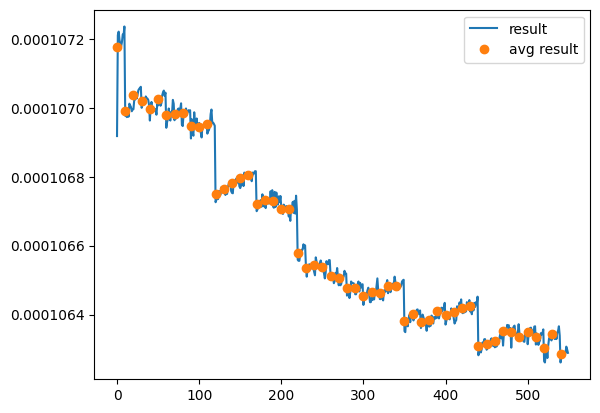

In [235]:
x_result = np.arange(0, len(exp_result))
x_avg = np.arange(0, len(avg_exp_result))*number_reading_pulses
plt.plot(x_result, exp_result,'-', label ='result')
plt.plot(x_avg, avg_exp_result, 'o',label ='avg result')
plt.legend()

In [232]:
k.smua.nvbuffer1.clear()
number_writing_pulses = 10
k.PulseVMeasureI(k.smua, 0, 0.2, 20e-3, 50e-3, number_writing_pulses) 
#-- Clear buffer 1.

# 20250728

In [20]:
# gate = smub
# drain = smua

# turn on the gate
k.smub.source.levelv = -0.7

# drain pulse to measure
# -- Restore 2600B defaults.
k.smua.reset()
#-- Select measure I autorange.
k.smua.measure.autorangei = k.smua.AUTORANGE_ON # (with very small current -> timeout error)
# k.smua.measure.rangei = 1e-7

# turn autozero off for sweeping or time critical measurements
k.smua.measure.autozero = k.smua.AUTOZERO_OFF

#-- Select ASCII data format.
k.format.data = k.format.ASCII
#-- Clear buffer 1.
k.smua.nvbuffer1.clear()
#-- Enable append buffer mode.
k.smua.nvbuffer1.appendmode = 1
#-- Enable source value storage.
k.smua.nvbuffer1.collectsourcevalues = 1

#-- Enable source value storage.
k.smua.nvbuffer1.collecttimestamps = 1

In [21]:
#-- Turn on the output.
k.smua.source.output = k.smua.OUTPUT_ON
k.smub.source.output = k.smua.OUTPUT_ON

In [22]:
#-- Restore 2600B defaults.
# -- Set compliance to 1u A.
#-- Clear buffer 1.
k.smua.nvbuffer1.clear()

# k.smua.source.limiti = 1e-3

k.smua.source.output = k.smua.OUTPUT_ON

# run the factory script
# PulseVMeasureI(smu, bias, level, ton, toff, points)
k.PulseVMeasureI(k.smua, 0, 0.2, 20e-3, 50e-3, 10) 

In [23]:
print(f"{k.smua.nvbuffer1.n}")
n_samples = k.smua.nvbuffer1.n

for i in range(0, n_samples):
    print(f"{i=} {'='*10}")
    print(f"{k.smua.nvbuffer1.readings[i+1]=}")
    print(f"{k.smua.nvbuffer1.sourcevalues[i+1]=}")
    print(f"{k.smua.nvbuffer1.timestamps[i+1]=}")

10
i=0 ==========
k.smua.nvbuffer1.readings[i+1]=5.57644e-05
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0
i=1 ==========
k.smua.nvbuffer1.readings[i+1]=7.46666e-05
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.090643
i=2 ==========
k.smua.nvbuffer1.readings[i+1]=0.00020309
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.160864
i=3 ==========
k.smua.nvbuffer1.readings[i+1]=0.000209056
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.231029
i=4 ==========
k.smua.nvbuffer1.readings[i+1]=0.000210293
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.301194
i=5 ==========
k.smua.nvbuffer1.readings[i+1]=0.000210618
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.371359
i=6 ==========
k.smua.nvbuffer1.readings[i+1]=0.000210664
k.smua.nvbuffer1.sourcevalues[i+1]=0.2
k.smua.nvbuffer1.timestamps[i+1]=0.441524
i=7 ==========
k.smua.nvbuffer1.

# Others

In [9]:
from ctypes import *
print(c_ubyte(2) == c_ubyte(2))
print(c_ubyte(2).value == c_ubyte(2).value)

False
True


In [20]:
import time

In [28]:
start = time.time()

time.sleep(1)
for i in range(0,100000000):
    pass

duration = time.time() - start
print(f"{duration=}")

duration=3.5423691272735596


In [3]:
import numpy as np
from ctypes import *

# convert numpy array to c_type array
a = np.zeros(3, dtype='d')
a_ctype_double = np.ctypeslib.as_ctypes(a)
b = (c_double*3)(0 , 0, 0)
print(a_ctype_double, b)

#
c = np.zeros(3, dtype='d')
d = np.ones(2, dtype='d')
f = np.concatenate((c, d), axis=0)
print(f)

read_pulse = np.ones(1, dtype='d')
write_pulse = np.ones(1, dtype='d')
wait_duration = np.zeros(20, dtype='d')
full_signal = np.concatenate((read_pulse, wait_duration, write_pulse), axis= 0)
print(full_signal)


<c_double_Array_3 object at 0x000001FE7FEEDA40> <c_double_Array_3 object at 0x000001FE7FEEC940>
[0. 0. 0. 1. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [12]:
# no x
0.0009178 - 0.0009019, 0.0009166 - 0.0009012, 0.0009165 - 0.0008995, 0.0009173 - 0.0009001

(1.5900000000000007e-05,
 1.540000000000005e-05,
 1.699999999999998e-05,
 1.7199999999999984e-05)

In [14]:
# sDx
0.0009455 - 0.0009321, 0.0009472 - 0.0009345, 0.0009492 - 0.0009375, 0.0009507 -0.0009393, 0.0009521- 0.0009402

(1.34e-05,
 1.2700000000000038e-05,
 1.1700000000000013e-05,
 1.1399999999999952e-05,
 1.1900000000000018e-05)

# stdp record

In [1]:
from ctypes import *
import sys
import os
from os import sep
import logging
import threading
import pandas as pd
import csv

if sys.platform.startswith("win"):
    dwf = cdll.dwf
    constants_path = "C:" + sep + "Program Files (x86)" + sep + "Digilent" + sep + "WaveFormsSDK" + sep + "samples" + sep + "py"
elif sys.platform.startswith("darwin"): # on macOS
    dwf = cdll.LoadLibrary("/Library/Frameworks/dwf.framework/dwf")
else: # on Linux
    dwf = cdll.LoadLibrary("libdwf.so")
    constants_path = sep + "usr" + sep + "share" + sep + "digilent" + sep + "waveforms" + sep + "samples" + sep + "py"

# Import constans
sys.path.append(constants_path)
import dwfconstants 

import math
import time
import numpy as np


In [5]:
#declare ctype variables
hdwf = c_int()
sts = c_byte()
hzAcq = c_double(200)
    
#print(DWF version
version = create_string_buffer(16)
dwf.FDwfGetVersion(version)
print("DWF Version: "+str(version.value))

#open device
print("Opening first device")
dwf.FDwfDeviceOpen(c_int(-1), byref(hdwf))

if hdwf.value == dwfconstants.hdwfNone.value:
    szerr = create_string_buffer(512)
    dwf.FDwfGetLastErrorMsg(szerr)
    print(str(szerr.value))
    print("failed to open device")
    quit()

dwf.FDwfDeviceAutoConfigureSet(hdwf, c_int(0)) # 0 = the device will only be configured when FDwf###Configure is called

# init logger
format = "%(asctime)s: %(message)s"
log_file_path = 'example.log'
logging.basicConfig(format=format, level=logging.INFO,  
                        datefmt="%H:%M:%S", filename= log_file_path, filemode= 'w')

DWF Version: b'3.24.2'
Opening first device


In [6]:
def record (recordfreq, res, file_path, stop):
    # recordfreq: record frequency [Hz]
    # res: resistor for current measurement [Ohm]
    # stop: signal for the function

    # global dwf, hdwf
    # record using 2 osc channels:
        # osc_1 : measure current
        # osc_2 : measure Vds of OECT
    
            # ======
            # Prepare record file
            # ======
    field_names = ['time', 'i', 'v']
    with open(file_path, 'w') as file:
        file_writer = csv.DictWriter(file, fieldnames=field_names)
        file_writer.writeheader()
    
    # This is the PC buffer (or recorded file in the computer).
    # It is TOTALLY DIFFERENT FROM the internal buffer (of the FPGA, which is around 32K samples) 
    # of the analog-in channels of the Analog Device 3.
    # The PC buffer limit only decided by the available disk space in PC, which this code is run.
    # nSamples = 500# 2000000
    cAvailable = c_int()
    cLost = c_int()
    cCorrupted = c_int()
    fLost = 0
    fCorrupted = 0

    #set up acquisition (channel 1 + 2)
    dwf.FDwfAnalogInChannelEnableSet(hdwf, c_int(0), c_int(1))
    dwf.FDwfAnalogInChannelEnableSet(hdwf, c_int(1), c_int(1))
    
    dwf.FDwfAnalogInChannelRangeSet(hdwf, c_int(0), c_double(5))
    dwf.FDwfAnalogInChannelRangeSet(hdwf, c_int(1), c_double(5))
    
    dwf.FDwfAnalogInAcquisitionModeSet(hdwf, dwfconstants.acqmodeRecord)
    dwf.FDwfAnalogInFrequencySet(hdwf, recordfreq)
    dwf.FDwfAnalogInRecordLengthSet(hdwf, c_double(-1)) # c_double(nSamples/hzAcq.value), -1 infinite record length 
    dwf.FDwfAnalogInConfigure(hdwf, c_int(1), c_int(0))


    #wait at least 2 seconds for the offset to stabilize
    time.sleep(2)

    logging.info(f"Starting oscilloscope")
    dwf.FDwfAnalogInConfigure(hdwf, c_int(0), c_int(1))

    cSamples = 0
    sample_idx = 0
    time_step = 1/recordfreq # [s]
    while True:
        dwf.FDwfAnalogInStatus(hdwf, c_int(1), byref(sts))
        if cSamples == 0 and (sts == dwfconstants.DwfStateConfig or sts == dwfconstants.DwfStatePrefill or sts == dwfconstants.DwfStateArmed) :
            logging.info(f"Acquisition not yet started")
            # Acquisition not yet started.
            continue

        dwf.FDwfAnalogInStatusRecord(hdwf, byref(cAvailable), byref(cLost), byref(cCorrupted))
        
        cSamples += cLost.value

        if cLost.value :
            fLost = 1
        if cCorrupted.value :
            fCorrupted = 1

        if cAvailable.value==0 :
            continue
        
        n_samples = cAvailable.value
        logging.info(f"OSC, {cAvailable.value=}")
        rgdSamples1 = (c_double*n_samples)()
        rgdSamples2 = (c_double*n_samples)()

        dwf.FDwfAnalogInStatusData(hdwf, c_int(0), byref(rgdSamples1), cAvailable) # get channel 1: current
        dwf.FDwfAnalogInStatusData(hdwf, c_int(1), byref(rgdSamples2), cAvailable) # get channel 2: voltage

        # logging.info(f"OSC, {rgdSamples1=}")
            # record to file
        with open(file_path, 'a') as file: 
                # NOTICE: THE WHILE LOOP/ FOR LOOP INSIDE -> NO CONSTANT UPDATE TO FILE AT ALL -> NO ANIMATION
                file_writer = csv.DictWriter(file, fieldnames=field_names)
                for i in range(0, n_samples):
                    info = {
                                'time': sample_idx * time_step,
                                'i': rgdSamples1[i]/res,
                                'v': rgdSamples2[i]
                    }
                    sample_idx = sample_idx + 1
                    file_writer.writerow(info)
    
        # time.sleep(0.1)

            # stop the recording process
        if stop():
            logging.info(f"oscillocope, lost    : {cSamples=}")
            logging.info(f"oscillocope, lost    : {fLost=}")
            logging.info(f"oscillocope, corrupt    : {fCorrupted=}")
            break

    logging.info("oscilloscope    : EXIT")
    return


In [7]:
def wavegen (signal_freq, stop):
    # signal_freq: [Hz]

    # global dwf, hdwf
        # parameters
    out_ch_1 = c_int(0)
    w1_amplitude = -200e-3 # [V]
    w1_offset = 0 # [V]
    percentageSymmetry = 50
    secRun = 1* (1/signal_freq) # [s], 1 period only
    
    out_ch_2 = c_int(1)
    w2_amplitude = 200e-3 # [V]
    w2_offset = 0 # [V]

    rest_time = 1 # [s]

    logging.info("generate signals")

    logging.info("configure w1")
    dwf.FDwfAnalogOutNodeEnableSet(hdwf, out_ch_1, dwfconstants.AnalogOutNodeCarrier, c_int(1))
    dwf.FDwfAnalogOutNodeFunctionSet(hdwf, out_ch_1, dwfconstants.AnalogOutNodeCarrier, dwfconstants.funcPulse)
    dwf.FDwfAnalogOutNodeFrequencySet(hdwf, out_ch_1, dwfconstants.AnalogOutNodeCarrier, c_double(signal_freq))
    # FDwfAnalogOutNodeSymmetrySet(HDWF hdwf, int idxChannel, AnalogOutNode node, double percentageSymmetry)
    dwf.FDwfAnalogOutNodeSymmetrySet(hdwf, out_ch_1, dwfconstants.AnalogOutNodeCarrier, c_double(percentageSymmetry))
    dwf.FDwfAnalogOutOffsetSet(hdwf, out_ch_1, c_double(w1_offset))
    dwf.FDwfAnalogOutNodeAmplitudeSet(hdwf, out_ch_1, dwfconstants.AnalogOutNodeCarrier, c_double(w1_amplitude))
    # FDwfAnalogOutRunSet(HDWF hdwf, int idxChannel, double secRun)
    dwf.FDwfAnalogOutRunSet(hdwf, out_ch_1, c_double(secRun))
    # FDwfAnalogOutRepeatSet(HDWF hdwf, int idxChannel, int cRepeat);
    dwf.FDwfAnalogOutRepeatSet(hdwf, out_ch_1, c_int(1))
    idle = dwfconstants.DwfAnalogOutIdleOffset
    dwf.FDwfAnalogOutIdleSet(hdwf, out_ch_1, idle)

    logging.info("configure w2")
    dwf.FDwfAnalogOutNodeEnableSet(hdwf, out_ch_2, dwfconstants.AnalogOutNodeCarrier, c_int(1))
    dwf.FDwfAnalogOutNodeFunctionSet(hdwf, out_ch_2, dwfconstants.AnalogOutNodeCarrier, dwfconstants.funcSquare)
    dwf.FDwfAnalogOutNodeFrequencySet(hdwf, out_ch_2, dwfconstants.AnalogOutNodeCarrier, c_double(signal_freq))
    # FDwfAnalogOutNodeSymmetrySet(HDWF hdwf, int idxChannel, AnalogOutNode node, double percentageSymmetry)
    dwf.FDwfAnalogOutNodeSymmetrySet(hdwf, out_ch_2, dwfconstants.AnalogOutNodeCarrier, c_double(percentageSymmetry))
    dwf.FDwfAnalogOutOffsetSet(hdwf, out_ch_2, c_double(w2_offset))
    dwf.FDwfAnalogOutNodeAmplitudeSet(hdwf, out_ch_2, dwfconstants.AnalogOutNodeCarrier, c_double(w2_amplitude))
    # FDwfAnalogOutRunSet(HDWF hdwf, int idxChannel, double secRun)
    dwf.FDwfAnalogOutRunSet(hdwf, out_ch_2, c_double(secRun))
    # FDwfAnalogOutRepeatSet(HDWF hdwf, int idxChannel, int cRepeat);
    dwf.FDwfAnalogOutRepeatSet(hdwf, out_ch_2, c_int(1))
    idle = dwfconstants.DwfAnalogOutIdleOffset
    dwf.FDwfAnalogOutIdleSet(hdwf, out_ch_2, idle)
    # # FDwfAnalogOutTriggerSourceSet(HDWF hdwf, int idxChannel, TRIGSRC trigsrc)
    # trgsrc = dwfconstants.trigsrcAnalogOut1
    # dwf.FDwfAnalogOutTriggerSourceSet(hdwf, out_ch_2, trgsrc)

    logging.info("start the wavegen")
    while True:
        # FDwfAnalogOutConfigure(HDWF hdwf, int idxChannel, int fStart)
        dwf.FDwfAnalogOutConfigure(hdwf, out_ch_1, c_int(1))
        time.sleep(secRun)
        dwf.FDwfAnalogOutConfigure(hdwf, out_ch_2, c_int(1))
        
        time.sleep(rest_time)
        
        if stop():
            # stop all channels
            dwf.FDwfAnalogOutConfigure(hdwf, -1, c_int(0))
            break
    
    logging.info("wavegen: EXIT")
    return


In [ ]:
logging.info("Main    : Prepare measurement")

stop_gen_threads = False
signal_freq = 2 # [Hz]
# xgen = threading.Thread(target=wavegen, daemon=True, args=(signal_freq, lambda: stop_gen_threads, ))
xgen = threading.Thread(target=wavegen, args=(signal_freq, lambda: stop_gen_threads, ))

stop_osc_threads = False
rec_freq = 100000000 # [Hz]
# Resistor for current measurement (res)
R = 0.00205806419e+3 # Ohm
file_path = "C:/Users/20245580/LabCode/Codes_For_Experiments/exp_data/20250616/stdp.csv"
xosc = threading.Thread(target=record, args=(rec_freq, R, file_path, lambda: stop_osc_threads, ))

logging.info("Main    : Run measurement")
xosc.start()
time.sleep(2)
xgen.start()


In [9]:
stop_gen_threads = True


In [10]:
stop_osc_threads = True

In [11]:
dwf.FDwfDeviceCloseAll()

1